In [1]:
# import pandas as pd
# import numpy as np
# import requests

# # Path: api_fetch.ipynb
# def get_data(self,api):
#     response = requests.get(f"{api}")
#     if response.status_code == 200:
#         print("Succesfully fetched the data")
#         self.formatted_print(response.json())
#     else:
#         print(f"Error: {response}")

In [1]:
import pandas as pd
# import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
        data.columns = names
        return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","FEYE", "FB","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_data(ticks)
print(d.shape)



Exception in thread Thread-5 (_run_via_pool):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1520.0_x64__qbz5n2kfra8p0\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1520.0_x64__qbz5n2kfra8p0\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yfinance\multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "C:\Users\parth\AppData\Local\Packages\Python

KeyboardInterrupt: 

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
data = pdr.get_data_yahoo("SPY",start="2017-01-01", end="2017-04-30")

ModuleNotFoundError: No module named 'pandas_datareader'

In [1]:
!pip install yahoo_fin

     -------------------------------------- 81.1/81.1 kB 753.9 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for fake-useragent from https://files.pythonhosted.org/packages/56/56/f72e9ca4f9cfb966f489c2b8ea04c67fa8d0cfbb62b1651cb9d6aef110a6/fake_useragent-1.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for parse from https://files.pythonhosted.org/packages/9c/57/6c51ccd70de3ebcfb0bb5b0eea2ac0ab13c51ab55043a7243faef9eb58ef/parse-1.19.1-py2.py3-none-any.whl.metadata
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to bu

In [4]:
import yahoo_fin.stock_info as si 
sp500_list = si.tickers_sp500()
print("Number of tickers in S&P 500",len(sp500_list))
sp500_list[0:15]


Number of tickers in S&P 500 503


['A',
 'AAL',
 'AAPL',
 'ABBV',
 'ABNB',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP']

In [5]:
sp500_historical ={}
for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker,start_date="01/01/2018", index_as_date = False, interval="1d")
sp500_historical['AAPL']

,date,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776516,102223600,AAPL
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769432,118071600,AAPL
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958786,89738400,AAPL
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425125,94640000,AAPL
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271255,82271200,AAPL
...,...,...,...,...,...,...,...,...
1450,2023-10-06,173.800003,177.990005,173.179993,177.490005,177.490005,57224100,AAPL
1451,2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800,AAPL
1452,2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000,AAPL
1453,2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100,AAPL


In [165]:
# now we will combine all the dataset
import pandas as pd
data = pd.concat(sp500_historical) 
data.reset_index(drop=True,inplace=True)
data1 = data
# data1

In [166]:
#displaying the adjusted closing prices for every stock 
data = data.pivot(index='date',columns='ticker',values='adjclose')
#taking care of the null values here
tickers = data.columns
for ticker in tickers:
    data[ticker] = data[ticker].fillna(0)
# data.head()
data1 = data
data1


ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,...,USB,V,VFC,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WHR,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.734863,51.647560,40.776516,75.741013,0.000000,53.380825,29.433332,140.888626,177.699997,80.850525,34.276726,102.931900,107.120003,49.885044,59.396854,9.090369,38.272549,50.712852,88.231544,56.644779,65.559998,122.456657,224.619995,71.539894,88.840309,74.672134,49.407356,9.13998,10.980000,69.941162,148.734146,149.899155,124.011787,59.450500,57.757500,148.550003,124.684685,55.568020,39.445679,144.519791,...,43.548092,110.172302,57.902267,14.935278,72.157127,0.000000,124.937012,92.891403,109.470001,152.910004,45.763832,39.050583,39.690186,79.991852,195.690002,59.744179,23.110001,74.649719,55.207420,50.694931,51.732357,136.681473,77.583755,21.958700,88.952385,27.624731,54.075504,97.520950,135.288315,27.664999,153.976532,40.473225,63.798717,63.374947,63.492668,73.644974,115.217339,103.709999,42.626465,69.128311
2018-01-03,66.381966,51.014027,40.769432,76.926262,0.000000,53.498859,29.459999,141.538864,181.039993,81.853531,34.011677,104.050049,109.379997,49.628746,58.896488,9.082010,38.385670,51.275383,88.480522,57.072994,65.940002,122.698708,231.199997,71.206100,88.892593,74.989861,50.282967,9.13998,11.550000,70.556458,151.540741,149.158066,124.495033,60.209999,58.900002,151.419998,126.675995,55.902176,40.362831,145.305710,...,43.975273,111.269142,57.404316,14.979856,72.538139,0.000000,127.229820,92.619980,110.900002,152.009995,46.039516,39.077763,38.874577,79.345581,197.770004,60.190563,22.620001,75.833015,55.014351,50.782032,52.130363,137.373077,78.710114,22.565138,89.728325,27.395973,54.652111,97.638557,137.819397,27.907953,152.308365,40.202335,65.051727,63.157833,64.266846,73.581810,116.016045,105.769997,42.576023,69.446152
2018-01-04,65.884026,51.335663,40.958786,76.487549,0.000000,53.408070,29.570000,143.214798,183.220001,81.764008,34.584518,105.043961,112.070000,49.064877,58.199249,9.048591,38.781570,51.479946,88.960678,57.601460,65.599998,121.237022,233.300003,70.433563,87.864044,76.036446,50.571739,9.13998,12.120000,71.123680,150.902161,149.705063,122.676117,60.479500,58.172501,151.820007,128.411270,56.164066,41.707359,145.864548,...,44.313778,111.682854,58.711437,15.009583,72.771385,0.000000,126.367653,93.085266,111.470001,153.070007,44.913803,40.137589,39.000622,80.416267,199.660004,57.073818,22.129999,75.374367,54.821281,49.689434,52.782421,137.356781,79.385918,22.952976,89.809525,27.506409,56.022591,97.609154,139.218399,27.680666,153.133041,39.889107,65.141777,63.148403,64.695938,74.330902,115.848854,107.860001,42.752579,69.860336
2018-01-05,66.937378,51.316177,41.425125,77.819061,0.000000,53.562428,29.453333,144.396225,185.339996,82.095352,34.353672,104.981850,110.839996,49.030693,58.076195,9.082010,39.038273,51.693020,90.081032,57.865685,65.830002,122.633553,241.070007,70.328659,88.796722,76.223335,50.860512,9.13998,11.880000,70.941025,151.801239,150.216751,123.466949,61.457001,59.192501,152.449997,129.501755,56.886555,41.306671,147.086960,...,44.587826,114.357536,58.898163,15.009583,73.113518,0.000000,124.965424,93.909195,113.000000,155.690002,44.684067,40.345924,38.911663,78.930809,202.229996,58.126034,22.000000,75.851372,54.451958,49.380650,53.138088,137.080124,79.286812,22.889517,90.341843,27.392021,56.248219,98.834290,140.111191,27.641489,154.154572,39.609756,65.089241,64.035698,64.574677,74.764091,117.000473,109.540001,42.769398,70.659775
2018-01-08,67.081024,50.809349,41.271255,76.572220,0.000000,53.408070,29.456667,145.550110,185.039993,82.238640,34.276726,104.662369,111.419998,49.611652,58.584793,9.082010,39.138332,51.352097,88.649483,57.902130,65.879997,127.968262,24

In [167]:
data1['ticker']

KeyError: 'ticker'

In [32]:
data.to_csv('S&P500_stock_data.csv')

In [ ]:
data.describe().T.apply(lambda x:round(x,3)).head(50)

<AxesSubplot: >

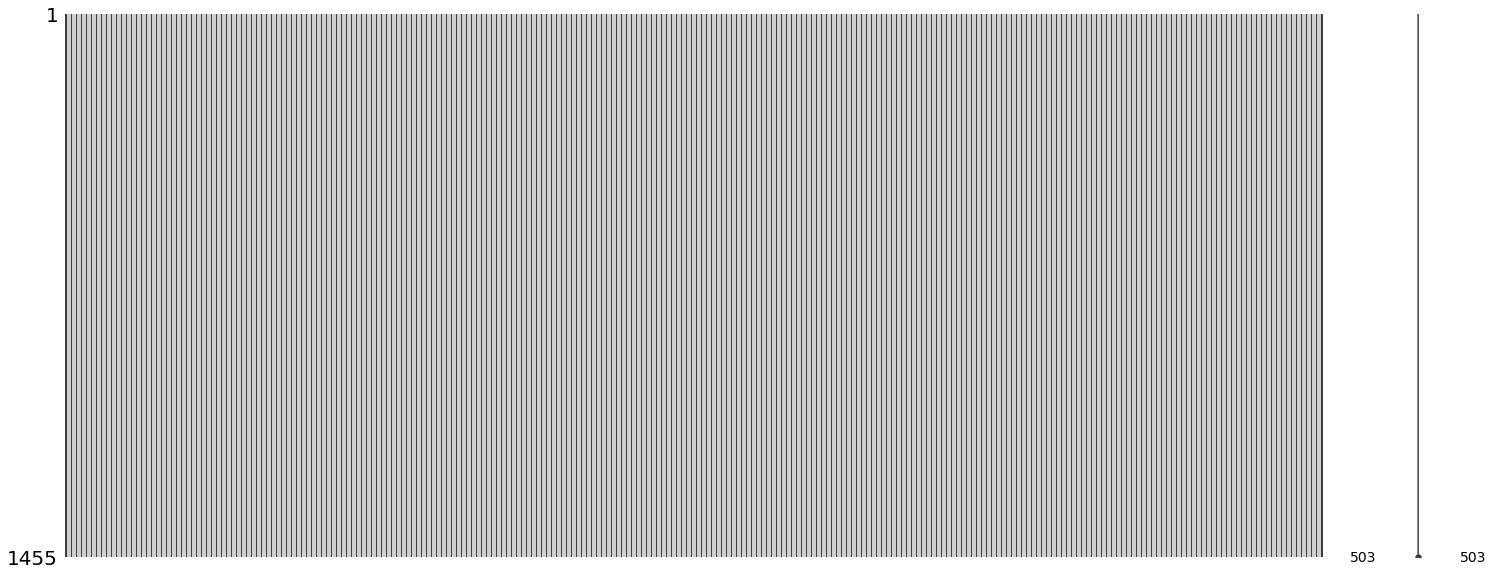

In [43]:
!pip install missingno
import missingno
missingno.matrix(data)

In [145]:
import numpy as np
import pandas as pd

# no data cleaning as our all values are manged
#calculating returns and stuff
returns = data.pct_change().mean()*266
returns = pd.DataFrame(returns)
returns.columns = ['returns']

returns['volatility'] = data.pct_change().std()*np.sqrt(266)
data = returns
data = data.reset_index()
# Filter rows where 'returns' is not infinity and 'volatility' is not NaN
data = data[~(np.isinf(data['returns']) | data['volatility'].isna())]

# data.head()
data1=data

In [147]:
data1

,ticker,returns,volatility
0,A,0.139490,0.297129
1,AAL,-0.086832,0.605989
2,AAPL,0.326944,0.329959
3,ABBV,0.163625,0.283667
5,ABT,0.131796,0.267784
...,...,...,...
498,YUM,0.116752,0.259802
499,ZBH,0.028071,0.314055
500,ZBRA,0.219724,0.423505
501,ZION,0.065012,0.446478


In [148]:
from sklearn.preprocessing import StandardScaler
# data = data.replace('A',0)
data = data.set_index('ticker')
scale = StandardScaler().fit(data)
scaled_data = pd.DataFrame(scale.transform(data), columns=data.columns, index=data.index)
X = scaled_data
X.head()
# X = scaled_data
# X.head()

# data

,returns,volatility
ticker,,
A,-0.063456,-0.618105
AAL,-2.059687,2.617532
AAPL,1.589940,-0.274175
ABBV,0.149423,-0.759125
ABT,-0.131324,-0.925516


#### Analysis of 3 clustering algorithms

- K Means Clustering
- Hierarchial Clustering
- Affinity Propogatiion Clustering

C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

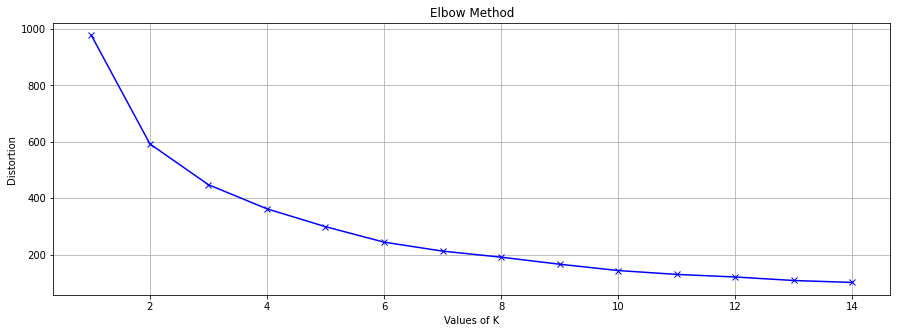

In [149]:
# K means
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [94]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


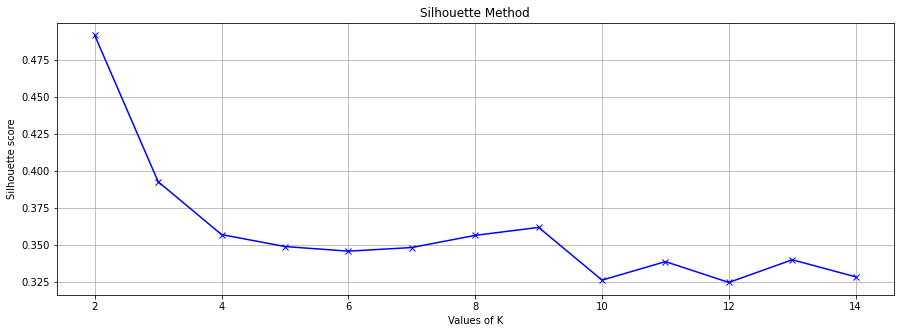

Suggested number of clusters:  4


In [150]:
# silhouetter score for measuring the perfect number of clusters
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


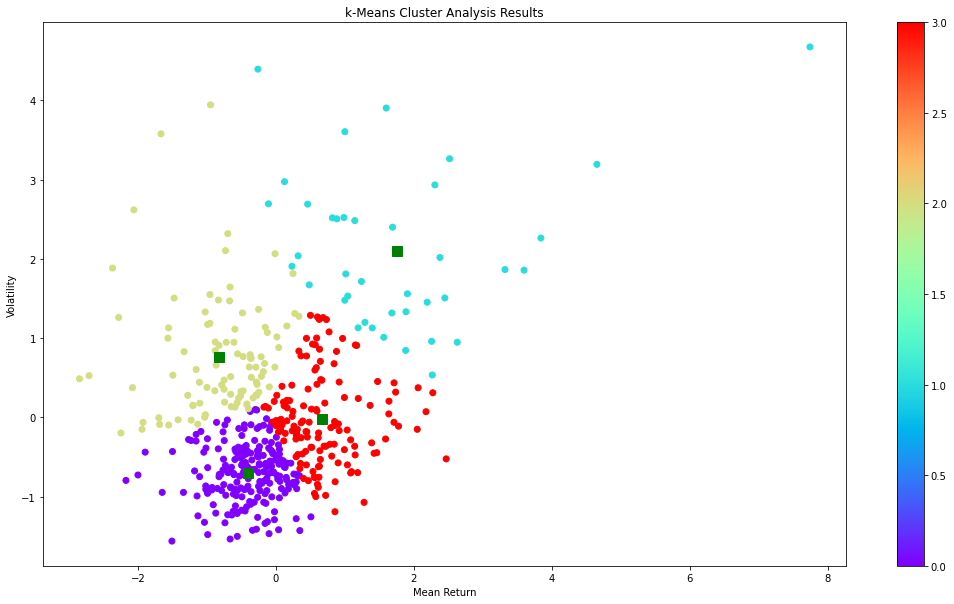

In [151]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

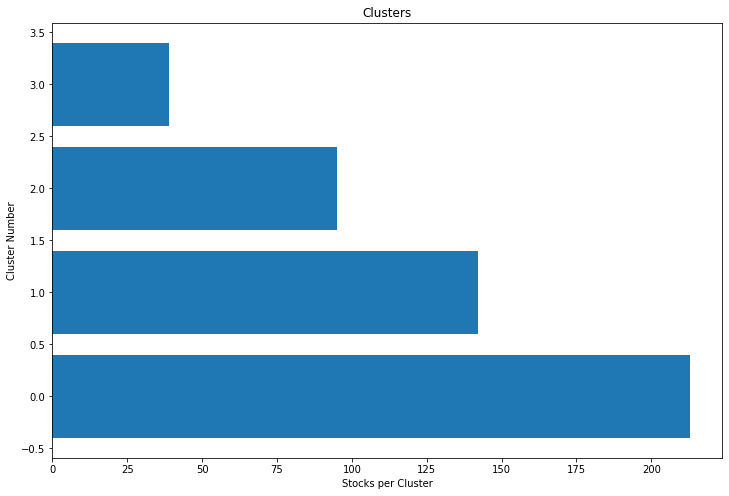

In [152]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()

#### HierarchialCLustering

- Ward linkage – it works by minimizing the within-cluster variance of the clusters that are in the process of merging.
- Average linkage – it calculates the average distance between each data point in two clusters.
- Complete linkage – measures the maximum distance between all data points in two clusters.
- Single linkage – groups the clusters in a bottom-up way.

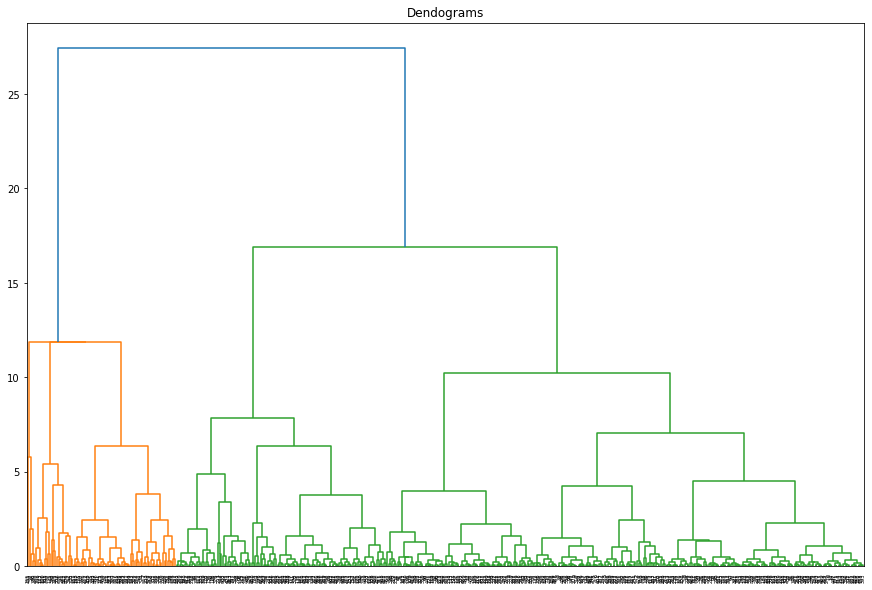

In [153]:
#Hierarchial Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X,method='ward'))

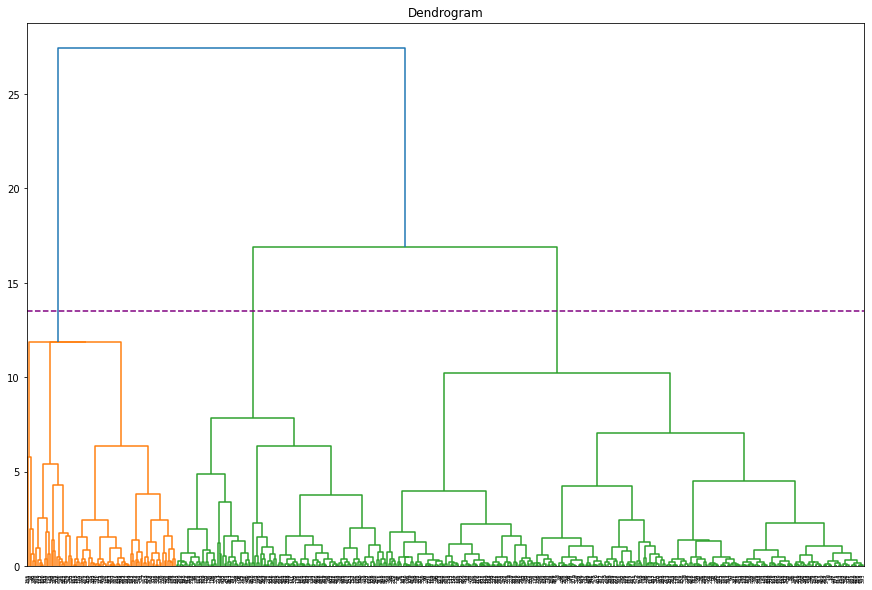

In [128]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=13.5, color='purple', linestyle='--')

C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


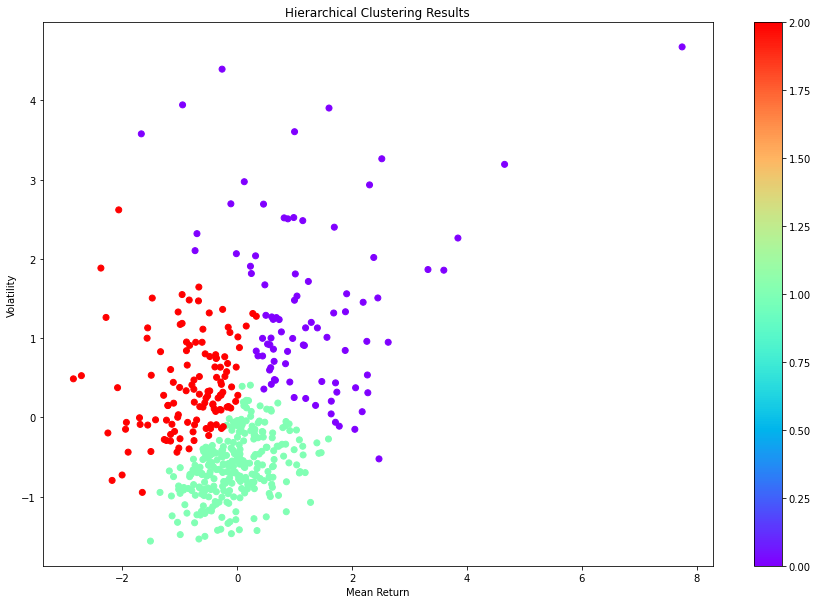

In [154]:
# here it cuts 3 models so we do it accordignly
#Fit the model
clusters = 3
hc = AgglomerativeClustering(n_clusters= clusters, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

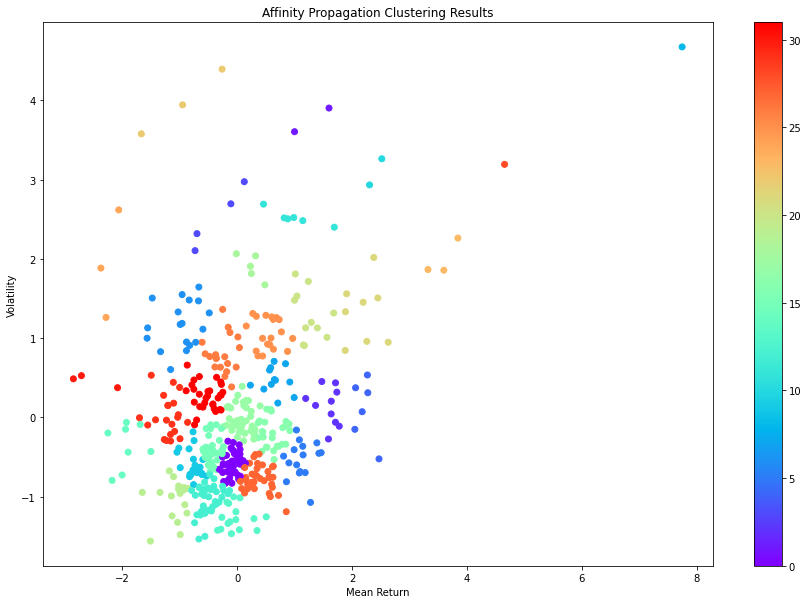

In [155]:
# Affinitty propogation
from sklearn.cluster import AffinityPropagation

#Fit the model
ap = AffinityPropagation()
ap.fit(X)
labels1 = ap.predict(X)

#Plot the results
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=labels1, cmap='rainbow')
ax.set_title('Affinity Propagation Clustering Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.show()

The number of clusters is: 32


<Figure size 432x288 with 0 Axes>

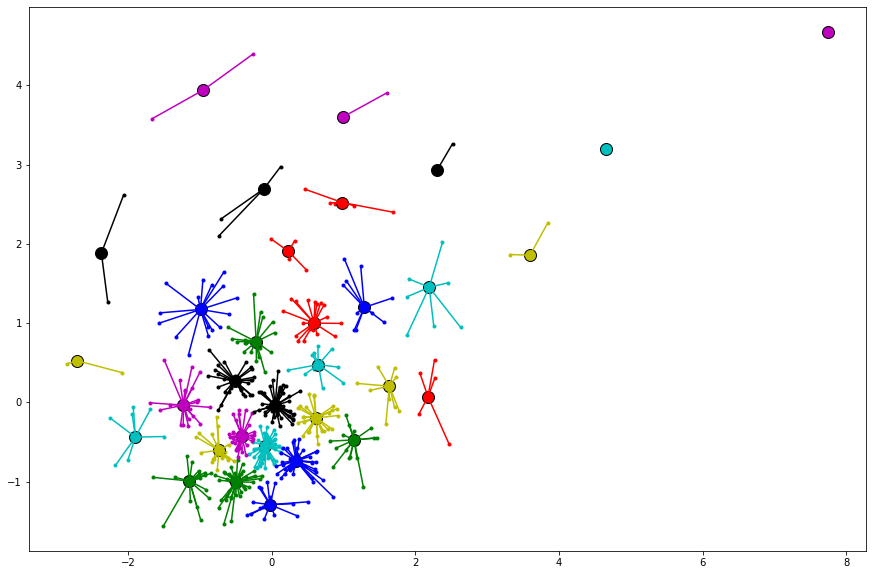

In [156]:
from itertools import cycle

#Extract the cluster centers and labels
cci = ap.cluster_centers_indices_
labels2 = ap.labels_

#Print their number
clusters = len(cci)
print('The number of clusters is:',clusters)

#Plot the results
X_ap = np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf
fig=plt.figure(figsize=(15,10))
colors = cycle('cmykrgbcmykrgbcmykrgbcmykrgb')
for k, col in zip(range(clusters),colors):
    cluster_members = labels2 == k
    cluster_center = X_ap[cci[k]]
    plt.plot(X_ap[cluster_members, 0], X_ap[cluster_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=12)
    for x in X_ap[cluster_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [157]:
print("k-Means Clustering", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("Hierarchical Clustering", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("Affinity Propagation Clustering", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

k-Means Clustering 0.3419757429321811
Hierarchical Clustering 0.35696852940922463
Affinity Propagation Clustering 0.3376069772941165


C:\Users\parth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [158]:
cluster_size_limit = 1000
counts = clustered_series.value_counts()
ticker_count = counts[(counts>1) & (counts<=cluster_size_limit)]
print ("Number of clusters: %d" % len(ticker_count))
print ("Number of Pairs: %d" % (ticker_count*(ticker_count-1)).sum())

Number of clusters: 4
Number of Pairs: 75590


In [159]:
from statsmodels.tsa.stattools import coint
def find_cointegrated_pairs(data, significance=0.05):
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [114]:
!pip install statsmodels

In [160]:
data1

,ticker,returns,volatility
0,A,0.139490,0.297129
1,AAL,-0.086832,0.605989
2,AAPL,0.326944,0.329959
3,ABBV,0.163625,0.283667
5,ABT,0.131796,0.267784
...,...,...,...
498,YUM,0.116752,0.259802
499,ZBH,0.028071,0.314055
500,ZBRA,0.219724,0.423505
501,ZION,0.065012,0.446478


In [161]:
data1['ticker']

0         A
1       AAL
2      AAPL
3      ABBV
5       ABT
       ... 
498     YUM
499     ZBH
500    ZBRA
501    ZION
502     ZTS
Name: ticker, Length: 489, dtype: object

In [143]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, clust in enumerate(ticker_count.index):
    tickers = clustered_series[clustered_series == clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(data1)
    cluster_dict[clust] = {}
    cluster_dict[clust]['score_matrix'] = score_matrix
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['pairs'] = pairs
    
pairs = []   
for cluster in cluster_dict.keys():
    pairs.extend(cluster_dict[cluster]['pairs'])
    
print ("Number of pairs:", len(pairs))
print ("In those pairs, we found %d unique tickers." % len(np.unique(pairs)))
print(pairs)

Number of pairs: 20
In those pairs, we found 6 unique tickers.
[('A', 'DGX'), ('A', 'HON'), ('A', 'NDAQ'), ('A', 'TXN'), ('A', 'UPS'), ('A', 'DGX'), ('A', 'HON'), ('A', 'NDAQ'), ('A', 'TXN'), ('A', 'UPS'), ('A', 'DGX'), ('A', 'HON'), ('A', 'NDAQ'), ('A', 'TXN'), ('A', 'UPS'), ('A', 'DGX'), ('A', 'HON'), ('A', 'NDAQ'), ('A', 'TXN'), ('A', 'UPS')]


In [162]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_data = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_data.T.loc[stocks]
X_pairs.head()

,returns,volatility
ticker,,
A,-0.063456,-0.618105
DGX,-0.457166,-0.912092
HON,-0.425429,-0.902060
NDAQ,0.250914,-0.843673
TXN,0.036279,-0.347921


#### t-SNE (t-distributed Stochastic Neighbor Embedding)
 is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data.

In [163]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(X_pairs)
X_tsne

array([[-245.49161  ,   69.92526  ],
       [  83.63093  ,  -84.188515 ],
       [   7.9490657,   84.88915  ],
       [-115.41675  ,   71.73492  ],
       [ -60.821842 ,  -64.32927  ],
       [ 135.01358  ,   51.14671  ]], dtype=float32)

C:\Users\parth\AppData\Local\Temp\ipykernel_33268\3774293952.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');


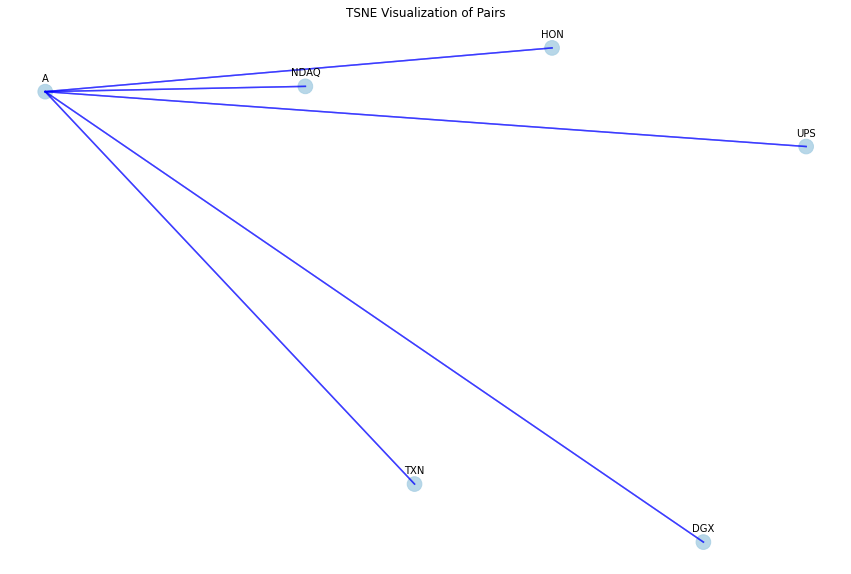

In [164]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='b');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()